# XOR

In [41]:
import numpy as np
#데이터 준비
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[0]])
#모델의 형상
#입력뉴런과 출력뉴런의 갯수는 프로그래머가 정할 수 없다.
#입력뉴런의 갯수는 입력 데이터의 피처수
#출력뉴런의 갯수는 타겟데이터의 값에 따라 결정
#은닉층의 계층수와 뉴런의 수는 프로그래머가 정한다.
in_n=2
h_n=2
out_n=1
#예측값 준비(초기 가중치)
W1=2*np.random.random((in_n,h_n))-1
W2=2*np.random.random((h_n,out_n))-1

In [43]:
X.shape,W1.shape,W2.shape,y.shape

((4, 2), (2, 2), (2, 1), (4, 1))

In [45]:
#활성화 함수
def act_f(z):#시그모이드 활성화 함수
    return 1/(1+np.exp(-z))
def act_f_d(x):#시그모이드 활성화 함수 도함수
    return x*(1-x)

순전파 연산(초기 가중치를 이용한)

In [48]:
#모델 형성
#입력->은닉
#입력층
l_in=X
#1번 계층 
z1=l_in@W1#입력값과 히든층의 가중치 내적연산
h1=act_f(z1)#z값 활성화 함수 연산
#은닉->출력
#2번 계층
z2=h1@W2#히든층출력과 출력층의 가중치 내적연산
l_out=act_f(z2)#결과 출력을 위한 연산 (출력함수==활성화함수)
print("출력:\n",l_out)#예측값

출력:
 [[0.33179364]
 [0.35359158]
 [0.37183084]
 [0.38639623]]


오차

In [51]:
out_err=y-l_out
out_err

array([[-0.33179364],
       [ 0.64640842],
       [ 0.62816916],
       [-0.38639623]])

오차 역전파

In [15]:
#출력오차
out_err=y-l_out
#출력 오차 전달
l_out_d=act_f_d(l_out)*out_err
#히든오차
h_err=l_out_d@W2.T
#히든 오차 전달
h_l_d=act_f_d(h1)*h_err
#최적화
W2-=0.2*(h1.T@l_out_d)
W1-=0.2*(l_in.T@h_l_d)

통합 정리

In [71]:
import numpy as np
#데이터 준비
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[0]])
#모델의 형상
in_n=2
h_n=3
out_n=1
#예측값 준비(초기 가중치)
W1=2*np.random.random((in_n,h_n))-1
W2=2*np.random.random((h_n,out_n))-1
#활성화 함수
def act_f(z):
    return 1/(1+np.exp(-z))
#도함수
def act_f_d(x):
    return x*(1-x)
#순방향 연산
l_in=X
z1=l_in@W1
h1=act_f(z1)
z2=h1@W2
l_out=act_f(z2)
print("학습전\n",l_out>=0.5)

학습률=0.5
반복수=10000
#학습
for i in range(반복수):
    #예측값 도출
    l_in=X
    z1=l_in@W1
    h1=act_f(z1)
    z2=h1@W2
    l_out=act_f(z2)
    #오차 도출
    out_err=l_out-y
    #오차 역전파
    l_out_d=act_f_d(l_out)*out_err
    h_err=l_out_d@W2.T
    h_l_d=act_f_d(h1)*h_err
    #가중치 연산
    W2 -= 학습률*(h1.T@l_out_d)
    W1 -= 학습률*(l_in.T@h_l_d)
    
l_in=X
z1=l_in@W1
h1=act_f(z1)
z2=h1@W2
l_out=act_f(z2)    
print("학습후\n",l_out>=0.5)

학습전
 [[ True]
 [ True]
 [ True]
 [ True]]
학습후
 [[False]
 [ True]
 [ True]
 [ True]]


In [19]:
h1.T.shape,l_out_d.shape

((2, 4), (4, 1))

In [23]:
l_in.T.shape,h_l_d.shape

((2, 4), (4, 2))

In [ ]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])

In [87]:
class Two_net:
    def __init__(self,hidden_units=10,lr=0.1):
        self.hidden_units=hidden_units
        self.w1=None
        self.b1=None
        self.w2=None
        self.b2=None
        self.losses=[]
        self.lr=lr
    def forpass(self,X):
        z1=X@self.w1+self.b1
        a1=self.act_f_relu(z1)
        z2=a1@self.w2+self.b2
        return z1,a1,z2
        
    def act_f_relu(self,z):
        return np.maximum(0,z)
        
    def act_f_sigmoid(self,z):
        z=np.clip(z,-100,None)
        return 1/(1+np.exp(-z))

    def backpass(self,X,a1,z1,z2,y):
        py=self.act_f_sigmoid(z2)
        err_output = py-y

        w2_g = (a1.T@err_output)/len(X)
        b2_g = np.mean(err_output)

        da1 = err_output@self.w2.T
        dz1 = da1*(z1>0)

        w1_g = (X.T@dz1) /len(X)
        b1_g = np.mean(dz1,axis=0)

        return w1_g,b1_g,w2_g,b2_g
    def fit(self,X,y,epoch=1000,batch_size=4):
        n_samples,n_features = X.shape
        np.random.seed(42)
        #가중치 초기화 He 초기화
        self.w1 = np.random.randn(n_features,self.hidden_units)*np.sqrt(2./n_features)
        self.b1 = np.zeros(self.hidden_units)
        self.w2 = np.random.randn(self.hidden_units,1)*np.sqrt(2./self.hidden_units)
        self.b2 = 0

        for _ in range(epoch):
            idx=np.random.permutation(n_samples)
            X_sf=X[idx]
            y_sf=y[idx].reshape(-1,1)
            loss=0
            for start in range(0,n_samples,batch_size):
                end = start+batch_size
                X_batch = X_sf[start:end]
                y_batch = y_sf[start:end]

                z1,a1,z2 = self.forpass(X_batch)
                py = self.act_f_sigmoid(z2)

                w1_g,b1_g,w2_g,b2_g = self.backpass(X_batch,a1,z1,z2,y_batch)

                self.w1 -= self.lr*w1_g
                self.b1 -= self.lr*b1_g
                self.w2 -= self.lr*w2_g
                self.b2 -= self.lr*b2_g

                py = np.clip(py,1e-10,1-1e-10)
                batch_loss=-np.mean(y_batch*np.log(py)+(1-y_batch)*np.log(1-py))
                loss+= batch_loss*len(X_batch)
            self.losses.append(loss/n_samples)
            
    def predict(self,X):
        _,_,z2=self.forpass(X)
        py = self.act_f_sigmoid(z2)
        return (py>0.5).astype(int)
    def score(self,X,y):
        return np.mean(self.predict(X)==y)

예측값: [0 1 1 0]
실제값: [0 1 1 0]
정확도 1.0


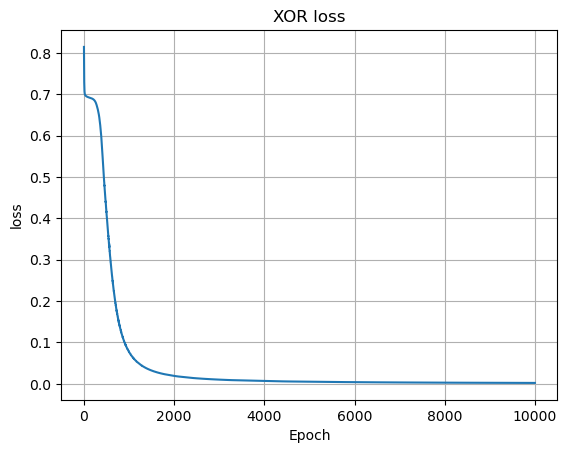

In [109]:
import matplotlib.pyplot as plt
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[0]])

m=Two_net(4)
m.fit(X,y,epoch=10000,batch_size=4)

py=m.predict(X)
print("예측값:",py.reshape(-1))
print("실제값:",y.reshape(-1))
print("정확도",m.score(X,y))

plt.plot(m.losses)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('XOR loss')
plt.grid(True)
plt.show()

In [113]:
from keras import models
from keras import layers
from keras import losses
from keras import optimizers
from keras import utils,preprocessing,activations

In [115]:
from keras.models import Sequential,Model
from keras.layers import Input,Dense
from keras.losses import binary_crossentropy,categorical_crossentropy,mean_squared_error,mean_absolute_error
from keras.optimizers import SGD

In [117]:
X.shape

(4, 2)

In [132]:
m=Sequential()#케이스
m.add(Input(shape=(2,)))
m.add(Dense(3,activation='relu'))
m.add(Dense(1,activation='sigmoid'))
m.compile(loss='binary_crossentropy')
m.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hy=m.fit(X,y,epochs=1000,batch_size=4)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 0.7618
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.7601
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.7589
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.7579
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.7570
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7562
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.7555
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.7548
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.7541
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7535
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.7529
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.7523
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.7517
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.7511
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.7506
Epo

In [136]:
m.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.41572618],
       [0.75406957],
       [0.41565698],
       [0.41565698]], dtype=float32)